In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/awesome/Downloads/Data Analysis/HPD/HPD.csv', parse_dates = ['Occurrence\nDate'])

In [3]:
df.columns = df.columns.str.replace('\n',' ')
list(df.columns)

['Incident',
 'Occurrence Date',
 'Occurrence Hour',
 'NIBRS Class',
 'NIBRSDescription',
 'Offense Count',
 'Beat',
 'Premise',
 'Block Range',
 'StreetName',
 'Street Type',
 'Suffix',
 'ZIP Code']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218428 entries, 0 to 218427
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Incident          218428 non-null  int64         
 1   Occurrence Date   218428 non-null  datetime64[ns]
 2   Occurrence Hour   218428 non-null  int64         
 3   NIBRS Class       218428 non-null  object        
 4   NIBRSDescription  218428 non-null  object        
 5   Offense Count     218428 non-null  int64         
 6   Beat              218307 non-null  object        
 7   Premise           218428 non-null  object        
 8   Block Range       218428 non-null  int64         
 9   StreetName        218428 non-null  object        
 10  Street Type       200763 non-null  object        
 11  Suffix            30456 non-null   object        
 12  ZIP Code          215724 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 21.

In [6]:
df.shape

(218428, 13)

In [7]:
df.rename(columns={'Occurrence Date':'Date','Occurrence Hour':'Hour', 'NIBRSDescription':'Description'}, inplace=True)

In [8]:
df.sample(5)

,Incident,Date,Hour,NIBRS Class,Description,Offense Count,Beat,Premise,Block Range,StreetName,Street Type,Suffix,ZIP Code
198356,157937219,2019-11-28,17,13B,Simple assault,1,3B10,"Residence, Home (Includes Apartment)",6000,SUNFOREST,DR,W,77092
42938,34817919,2019-03-19,23,290,"Destruction, damage, vandalism",1,9C20,"Residence, Home (Includes Apartment)",6305,FORCE,NaN,NaN,77020
154376,121463619,2019-09-17,10,240,Motor vehicle theft,1,17E10,"Parking Lot, Garage",5601,CHIMNEY ROCK,RD,NaN,77081
64610,52104119,2019-04-25,22,23F,Theft from motor vehicle,1,1A50,"Highway, Road, Street, Alley",3700,PORTSMOUTH,ST,NaN,77046
94192,74121419,2019-06-11,20,370,"Pornographs, obscene material",1,17E40,"Residence, Home (Includes Apartment)",11102,BRAEWICK,DR,NaN,77096


In [9]:
df['Month'] = df['Date'].dt.month
column_move1 = df['Month']
df.drop(labels=['Month'], axis=1, inplace=True)
df.insert(2,'Month', column_move1)

df['Day'] = df['Date'].dt.day
column_move2 = df['Day']
df.drop(labels=['Day'], axis=1, inplace=True)
df.insert(3,'Day', column_move2)

df['Day_of_Week'] = df['Date'].dt.day_name()
column_move3 = df['Day_of_Week']
df.drop(labels=['Day_of_Week'], axis=1, inplace=True)
df.insert(4,'Day_of_Week', column_move3)

df['week_of_year'] = df['Date'].apply(lambda x: x.weekofyear)
column_move4 = df['week_of_year']
df.drop(labels=['week_of_year'], axis=1, inplace=True)
df.insert(5,'week_of_year', column_move4)

df['day_of_year'] = df['Date'].apply(lambda x: x.dayofyear)
column_move5 = df['day_of_year']
df.drop(labels=['day_of_year'], axis=1, inplace=True)
df.insert(6,'day_of_year', column_move5)

In [10]:
df.sample(5)

,Incident,Date,Month,Day,Day_of_Week,week_of_year,day_of_year,Hour,NIBRS Class,Description,Offense Count,Beat,Premise,Block Range,StreetName,Street Type,Suffix,ZIP Code
98790,77828719,2019-06-19,6,19,Wednesday,25,170,12,13C,Intimidation,1,13D20,Shelter-Mission/Homeless,6550,HOGUE,ST,NaN,77087
21745,17527619,2019-02-09,2,9,Saturday,6,40,16,290,"Destruction, damage, vandalism",1,5F30,"Residence, Home (Includes Apartment)",8000,TIDWELL,RD,W,77040
50654,40993219,2019-04-02,4,2,Tuesday,14,92,10,23F,Theft from motor vehicle,1,22B30,"Grocery, Supermarket",11500,GREEN PLAZA,DR,NaN,77038
26734,21458919,2019-02-18,2,18,Monday,8,49,13,26B,"Credit card, ATM fraud",1,18F40,Speciality Store,6302,WESTHEIMER,RD,NaN,77057
64075,51735819,2019-04-25,4,25,Thursday,17,115,2,220,"Burglary, Breaking and Entering",1,4F30,"Other, Unknown",18600,PARK VIEW,DR,S,77084


# How many incidents are happening each day?

In [11]:
df['Date'].value_counts().describe()

count    365.000000
mean     598.432877
std       50.814076
min      449.000000
25%      566.000000
50%      600.000000
75%      634.000000
max      765.000000
Name: Date, dtype: float64

In [12]:
df['Date'].value_counts()[:10]

2019-05-01    765
2019-07-01    764
2019-06-01    723
2019-08-01    708
2019-11-01    705
2019-12-06    704
2019-11-22    704
2019-04-29    695
2019-05-15    691
2019-06-08    690
Name: Date, dtype: int64

In [13]:
##On average there are about 598 reported incidents with decent spread of data due to a small standard deviation.

In [14]:
df_count = df.groupby(['Date'])['Date'].agg(['count']).sort_values(by='Date').reset_index()
q1 = df_count['count'].quantile(0.25)
q3 = df_count['count'].quantile(0.75)
iqr = q3 -q1
l_limit = q1 -1.5*iqr
u_limit = q3 + 1.5*iqr
df_count[(df_count['count'] < l_limit) | (df_count['count'] > u_limit)]

,Date,count
63,2019-03-05,456
110,2019-04-21,449
120,2019-05-01,765
181,2019-07-01,764
331,2019-11-28,456


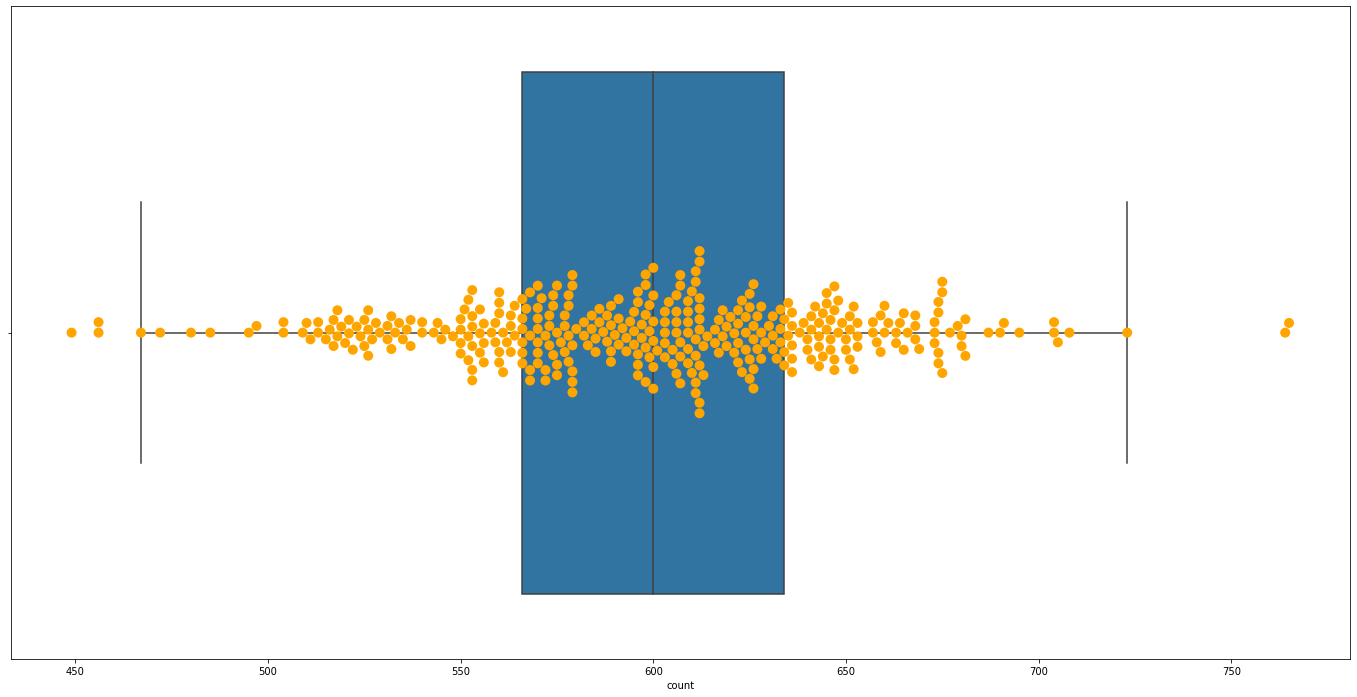

In [15]:
plt.figure(figsize=(24,12))
sns.boxplot(x='count', data=df_count, showfliers=False)
sns.swarmplot(x='count', data=df_count, color="orange", s=10)
plt.show()

## What are the top 10 most reported incidents?

In [16]:
def count_per(data):
    Total = df['Description'].value_counts()[:10]
    Percentage = df['Description'].value_counts(normalize=True)[:10]
    
    return pd.concat([Total,Percentage], axis=1, keys = ['Total', 'Percent'])
count_per(df)

,Total,Percent
Theft from motor vehicle,33062,0.151363
Simple assault,27138,0.124242
"Destruction, damage, vandalism",21617,0.098966
All other larceny,18440,0.084421
"Burglary, Breaking and Entering",16879,0.077275
Intimidation,14135,0.064712
Motor vehicle theft,13075,0.059860
Aggravated Assault,12652,0.057923
Shoplifting,10788,0.049389
Robbery,9195,0.042096


In [17]:
df[df['Description']=='Theft from motor vehicle'].groupby(['Date'])['Date'].agg(['count']).mean()

count    90.580822
dtype: float64

In [18]:
df[df['Description']=='Simple assault'].groupby(['Date'])['Date'].agg(['count']).mean()

count    74.350685
dtype: float64

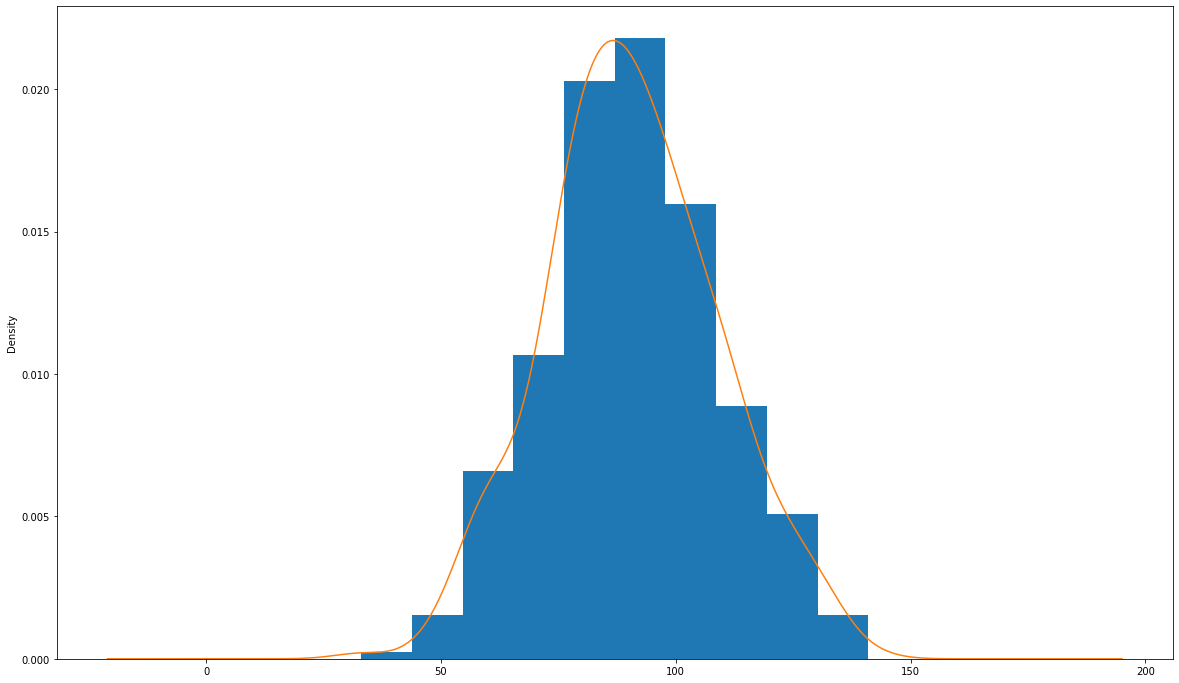

In [19]:
fig, ax = plt.subplots(figsize=(20,12))
ax = df[df['Description']=='Theft from motor vehicle'].groupby(['Date'])['Date'].count().plot(kind='hist', density=True)
ax1 = df[df['Description']=='Theft from motor vehicle'].groupby(['Date'])['Date'].count().plot(kind='kde')
plt.show()

In [20]:
##Theft from motor vehicle is the most reported incident and an average of over 90 reports a day.
## Thats about 22% more than simple assault.

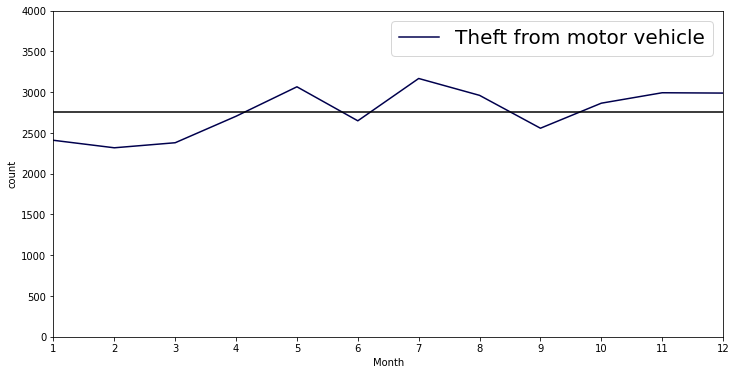

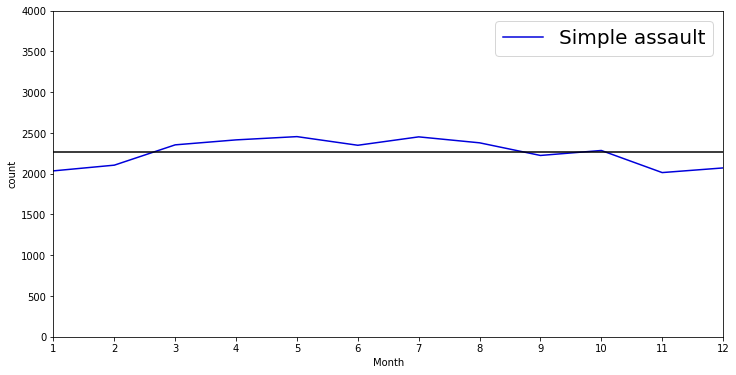

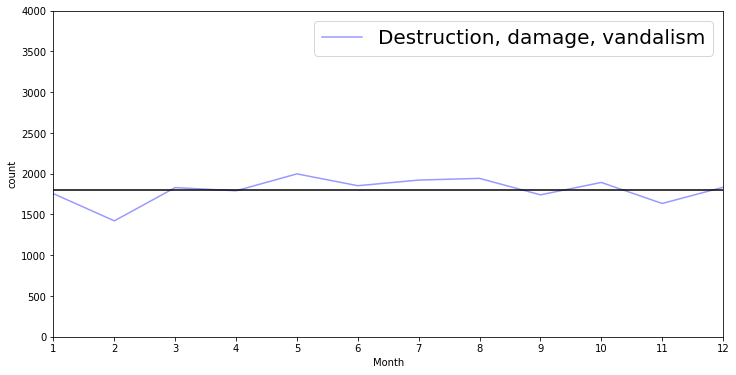

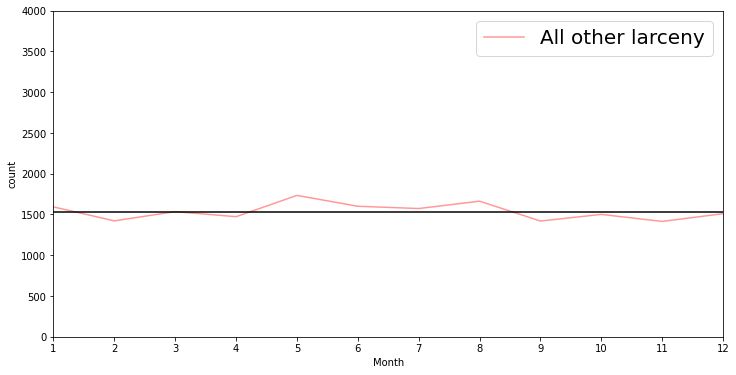

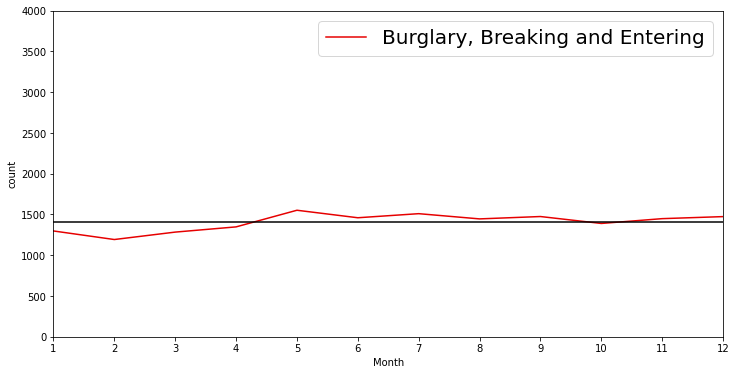

In [21]:
d = [x for x in df['Description'].value_counts()[:5].index]
for y in range(0,5):
    cmap = plt.get_cmap("seismic", len(d)+1)
    data = df[df['Description']==d[y]].groupby(['Month'])['Month'].agg(['count'])
    fig, ax = plt.subplots(figsize=(12,6), subplot_kw={'ylim': (0,4000)})
    ax = sns.lineplot(data=data, x="Month", y="count", label = d[y], color = cmap(y))
    mean = data['count'].mean()
    ax.axhline(mean, color='black')
    plt.xticks(range(1,13))
    plt.margins(0)
    plt.legend(loc='best', prop={'size':20})
    plt.show()

# What type of locations are these incidents happening mostly at?

In [21]:
def count_per(data):
    Total = df['Premise'].value_counts()[:10]
    Percentage = df['Premise'].value_counts(normalize=True)[:10]
    
    return pd.concat([Total,Percentage], axis=1, keys = ['Total', 'Percent'])
count_per(df)

,Total,Percent
"Residence, Home (Includes Apartment)",81140,0.371473
"Parking Lot, Garage",42139,0.192919
"Highway, Road, Street, Alley",27743,0.127012
"Other, Unknown",9988,0.045727
"Department, Discount Store",7118,0.032587
Restaurant,6146,0.028137
"Commercial, Office Building",5678,0.025995
Convenience Store,5372,0.024594
"Service, Gas Station",4816,0.022048
"Hotel, Motel, ETC",4029,0.018445


In [22]:
##There are 2 times as more incidents happening in residental area than Parking Lot, Garage.
## 37% chance of an incident happening at residental area.

In [23]:
def count_per(data):
    Total = df[df['Description']=='Theft from motor vehicle']['Premise'].value_counts()[:10]
    Percentage = df[df['Description']=='Theft from motor vehicle']['Premise'].value_counts(normalize=True)[:10]
    Overall = Total/df.shape[0]
    
    return pd.concat([Total,Percentage, Overall], axis=1, keys = ['Total', 'Percent', 'Overall'])
count_per(df)

,Total,Percent,Overall
"Parking Lot, Garage",17675,0.534602,0.080919
"Residence, Home (Includes Apartment)",5573,0.168562,0.025514
"Highway, Road, Street, Alley",4537,0.137227,0.020771
Restaurant,1052,0.031819,0.004816
"Hotel, Motel, ETC",596,0.018027,0.002729
"Other, Unknown",584,0.017664,0.002674
Park/Playground,574,0.017361,0.002628
"Service, Gas Station",533,0.016121,0.002440
"Commercial, Office Building",314,0.009497,0.001438
"Bar, Nightclub",258,0.007804,0.001181


In [24]:
## There are over 3 times as more Theft from motor vehicle happening in Parking Lot, Garage than residental areas.
## Of all the Theft from motor vehicles, 53% were in Parking Lot, Garage, with an 8% occurance overall.

In [161]:
def count_per(data):
    Total = df[df['Description']=='Simple assault']['Premise'].value_counts()[:10]
    Percentage = df[df['Description']=='Simple assault']['Premise'].value_counts(normalize=True)[:10]
    Overall = Total/df.shape[0]
    
    return pd.concat([Total,Percentage, Overall], axis=1, keys = ['Total', 'Percent', 'Overall'])
count_per(df)

,Total,Percent,Overall
"Residence, Home (Includes Apartment)",16760,0.617584,0.076730
"Highway, Road, Street, Alley",2918,0.107525,0.013359
"Parking Lot, Garage",2047,0.075429,0.009372
"Bar, Nightclub",667,0.024578,0.003054
"Hotel, Motel, ETC",663,0.024431,0.003035
"Other, Unknown",551,0.020304,0.002523
Restaurant,537,0.019788,0.002458
Convenience Store,469,0.017282,0.002147
"Service, Gas Station",424,0.015624,0.001941
"Drug Store, Doctors Office, Hospital",332,0.012234,0.001520


In [27]:
## Compared with other locations, 8 times more likely to get assaulted in a residental area than a parking lot, garage.
## A 61% chance a simple assualt is to happen in a residental area with 7% chance overall.

In [159]:
def count_per(data):
    Total = df[df['Premise']=='Residence, Home (Includes Apartment)']['Description'].value_counts()[:10]
    Percentage = df[df['Premise']=='Residence, Home (Includes Apartment)']['Description'].value_counts(normalize=True)[:10]
    Overall = Total/len(df)
    
    return pd.concat([Total,Percentage, Overall], axis=1, keys = ['Total', 'Percent', 'Overall'])
count_per(df)

,Total,Percent,Overall
Simple assault,16760,0.206557,0.076730
"Burglary, Breaking and Entering",10563,0.130182,0.048359
"Destruction, damage, vandalism",10009,0.123355,0.045823
Intimidation,8472,0.104412,0.038786
All other larceny,7265,0.089537,0.033260
Aggravated Assault,6856,0.084496,0.031388
Theft from motor vehicle,5573,0.068684,0.025514
Motor vehicle theft,2887,0.035580,0.013217
Robbery,1826,0.022504,0.008360
Theft of motor vehicle parts or accessory,1594,0.019645,0.007298


In [ ]:
##Simple Assault is 20% more like to happen in a residental area than other incidents.
## 8% chance overall

In [160]:
def count_per(data):
    Total = df[df['Premise']=='Parking Lot, Garage']['Description'].value_counts()[:10]
    Percentage = df[df['Premise']=='Parking Lot, Garage']['Description'].value_counts(normalize=True)[:10]
    Overall = Total/len(df)
    
    return pd.concat([Total,Percentage, Overall], axis=1, keys = ['Total', 'Percent', 'Overall'])
count_per(df)

,Total,Percent,Overall
Theft from motor vehicle,17675,0.419445,0.080919
Motor vehicle theft,5966,0.141579,0.027313
"Destruction, damage, vandalism",4832,0.114668,0.022122
Theft of motor vehicle parts or accessory,3016,0.071573,0.013808
Simple assault,2047,0.048577,0.009372
All other larceny,2006,0.047604,0.009184
Robbery,1989,0.047201,0.009106
Aggravated Assault,1301,0.030874,0.005956
"Drug, narcotic violations",852,0.020219,0.003901
Intimidation,715,0.016968,0.003273


In [32]:
##Theft from motor vehicle 42% more likely in a Parking Lot, Garage than other incidents.
## 8% chance overall

# Seasonal Trends

In [33]:
def seasons(df):
  if (df['Month'] == 12) | (df['Month'] >=1) & (df['Month'] <=2):
    return 'Winter'
  elif (df['Month'] >=3) & (df['Month'] <=5):
    return 'Spring'
  elif (df['Month'] >=6) & (df['Month'] <=8):
    return 'Summer'        
  else:
    return "Fall"
df['season'] = df.apply(seasons, axis=1)

column_move6 = df['season']
df.drop(labels=['season'], axis=1, inplace=True)
df.insert(8,'season', column_move6)

In [34]:
df.sample(1)

,Incident,Date,Month,Day,Day_of_Week,week_of_year,day_of_year,Hour,season,NIBRS Class,Description,Offense Count,Beat,Premise,Block Range,StreetName,Street Type,Suffix,ZIP Code
72758,57973219,2019-05-08,5,8,Wednesday,19,128,16,Spring,23F,Theft from motor vehicle,1,12D70,"Parking Lot, Garage",150,EL DORADO,BLVD,W,77546


In [35]:
df['season'].value_counts()

Summer    57112
Fall      55193
Spring    54994
Winter    51129
Name: season, dtype: int64

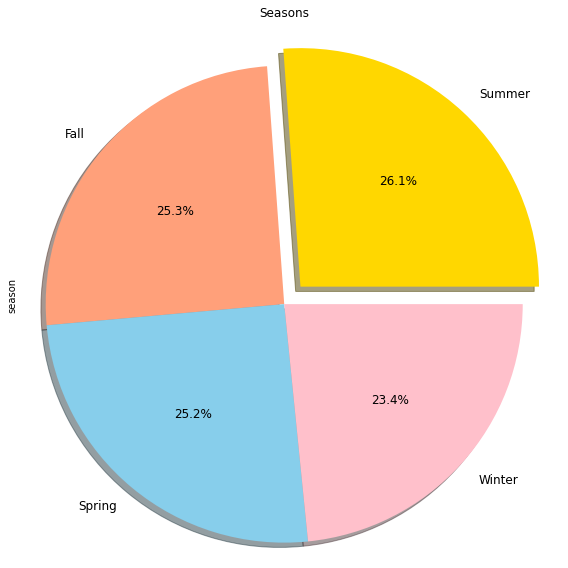

In [36]:
seasons_count = df['season'].value_counts()
colors = ['gold','lightsalmon','skyblue','pink']
explode = (0.1, 0, 0, 0)
seasons_count.plot(kind = 'pie', title='Seasons', explode= explode, subplots=True,
                       autopct='%1.1f%%',shadow=True,figsize=(8,8), fontsize= 12, colors= colors)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [37]:
## Although not a huge difference, summer has the highest report incidents
## The difference between the summer and winter is only 3%

In [38]:
seasons = ['Winter', 'Spring', 'Summer', 'Fall'] 
for s in seasons:
    print(s.capitalize())
    all_s = df[df['season']==s]['Description'].value_counts()[:5]
    print(all_s)
    print('\n')

Winter
Theft from motor vehicle           7717
Simple assault                     6211
Destruction, damage, vandalism     5011
All other larceny                  4525
Burglary, Breaking and Entering    3965
Name: Description, dtype: int64


Spring
Theft from motor vehicle           8151
Simple assault                     7224
Destruction, damage, vandalism     5619
All other larceny                  4742
Burglary, Breaking and Entering    4184
Name: Description, dtype: int64


Summer
Theft from motor vehicle           8778
Simple assault                     7180
Destruction, damage, vandalism     5718
All other larceny                  4837
Burglary, Breaking and Entering    4416
Name: Description, dtype: int64


Fall
Theft from motor vehicle           8416
Simple assault                     6523
Destruction, damage, vandalism     5269
All other larceny                  4336
Burglary, Breaking and Entering    4314
Name: Description, dtype: int64




In [39]:
fall = df[df['season']=='Fall']['Description'].value_counts().to_frame()[:5]
spring = df[df['season']=='Spring']['Description'].value_counts().to_frame()[:5]
summer = df[df['season']=='Summer']['Description'].value_counts().to_frame()[:5]
winter = df[df['season']=='Winter']['Description'].value_counts().to_frame()[:5]

In [40]:
fs = pd.merge(fall, spring, left_index=True, right_index=True)
fs

,Description_x,Description_y
Theft from motor vehicle,8416,8151
Simple assault,6523,7224
"Destruction, damage, vandalism",5269,5619
All other larceny,4336,4742
"Burglary, Breaking and Entering",4314,4184


In [41]:
sw = pd.merge(summer, winter, left_index=True, right_index=True)
sw

,Description_x,Description_y
Theft from motor vehicle,8778,7717
Simple assault,7180,6211
"Destruction, damage, vandalism",5718,5011
All other larceny,4837,4525
"Burglary, Breaking and Entering",4416,3965


In [42]:
fs.rename(columns={'Description_x':'Fall','Description_y':'Spring'}, inplace=True)
sw.rename(columns={'Description_x':'Summer','Description_y':'Winter'}, inplace=True)
all_seasons = pd.merge(fs, sw, left_index=True, right_index=True).T
all_seasons


,Theft from motor vehicle,Simple assault,"Destruction, damage, vandalism",All other larceny,"Burglary, Breaking and Entering"
Fall,8416,6523,5269,4336,4314
Spring,8151,7224,5619,4742,4184
Summer,8778,7180,5718,4837,4416
Winter,7717,6211,5011,4525,3965


In [43]:
i = [x for x in all_seasons.columns]
i

['Theft from motor vehicle',
 'Simple assault',
 'Destruction, damage, vandalism',
 'All other larceny',
 'Burglary, Breaking and Entering']

In [44]:
for x in i:
    print(x + ' with MAX in ' + all_seasons[x].idxmax() + ' and MIN in ' +  all_seasons[x].idxmin())
    season_difference = (all_seasons[x].max() - all_seasons[x].min())/ all_seasons[x].min() * 100
    print(season_difference)
    print('\n')

Theft from motor vehicle with MAX in Summer and MIN in Winter
13.74886613969159


Simple assault with MAX in Spring and MIN in Winter
16.30977298341652


Destruction, damage, vandalism with MAX in Summer and MIN in Winter
14.108960287367792


All other larceny with MAX in Summer and MIN in Fall
11.554428044280444


Burglary, Breaking and Entering with MAX in Summer and MIN in Winter
11.37452711223203




In [45]:
## The same top 5 incidents occur every season.
## Simple Assault has the largest increase of incidents from the min(Winter) and max(Summer) of 16%

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


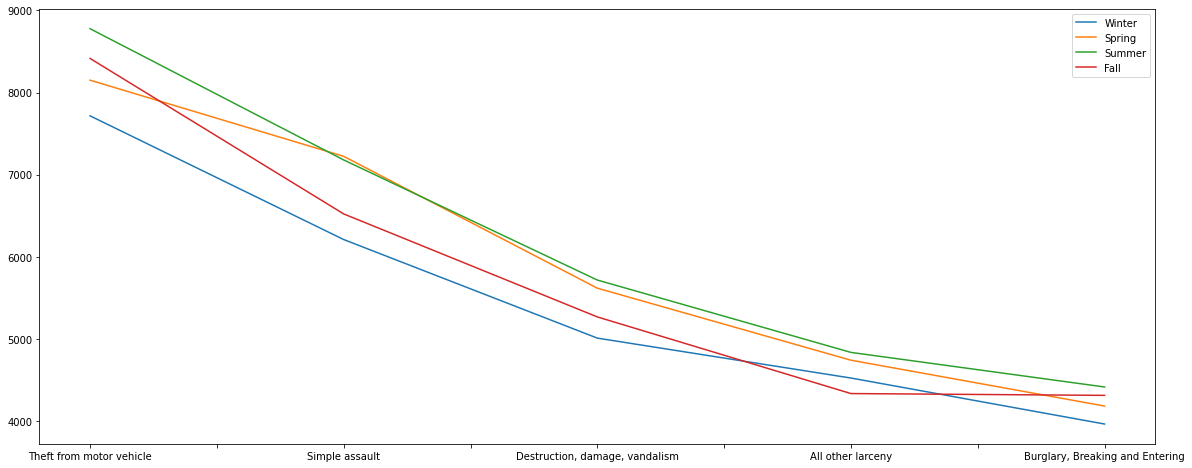

In [46]:
seasons = ['Winter', 'Spring', 'Summer', 'Fall'] 
for s in seasons:
    s_plot = df[df['season']==s]['Description'].value_counts()[:5].plot(figsize=(20,8))
    plt.legend(seasons)
    print(s_plot)

In [78]:
##Summer may have more incidents occuring, however Spring has more Simple assault incidents occuring.

# Are incidents more likely to occur on weekdays or weekend?

In [24]:
df['Type_of_Day']=['Weekend' if x == "Saturday" or x =='Sunday' or x=='Friday' and y >=16 else 'Weekday' for (x,y) in zip(df['Day_of_Week'],df['Hour'])]

In [25]:
df['Type_of_Day'].value_counts()

Weekday    142784
Weekend     75644
Name: Type_of_Day, dtype: int64

In [117]:
print(df[df['Type_of_Day']=='Weekday']['Day_of_Week'].value_counts().mean())
print(df[df['Type_of_Day']=='Weekend']['Day_of_Week'].value_counts().mean())

28556.8
25214.666666666668


In [118]:
cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
d_count = df.groupby(['Day_of_Week'])['Incident'].agg(['count']).sort_values(by='Day_of_Week').reindex(cats).reset_index()
d_count

,Day_of_Week,count
0,Sunday,29445
1,Monday,31425
2,Tuesday,31298
3,Wednesday,31237
4,Thursday,30635
5,Friday,32788
6,Saturday,31600


In [145]:
weekday_mean = df[df['Type_of_Day']=='Weekday']['Day_of_Week'].value_counts().mean()

In [147]:
weekend_mean = df[df['Type_of_Day']=='Weekend']['Day_of_Week'].value_counts().mean()

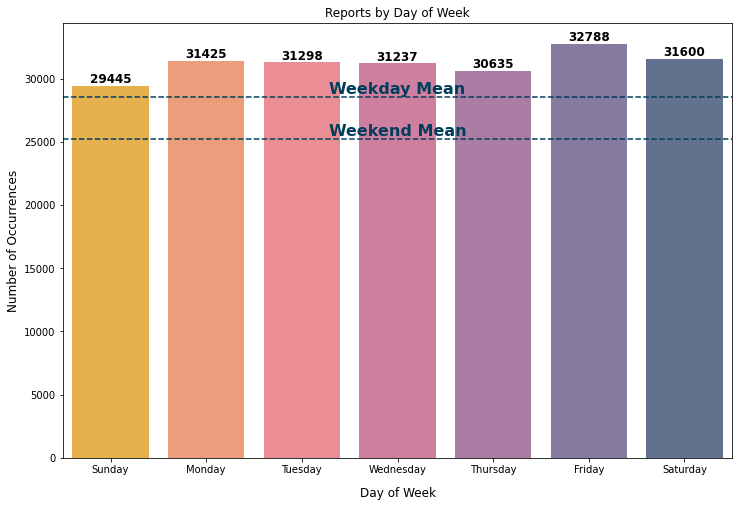

In [148]:
plt.figure(figsize=(12,8))
c = ['#ffa600', '#ff7c43', '#f95d6a', '#d45087', '#a05195', '#665191', '#2f4b7c']
graph = sns.barplot(x='Day_of_Week', y='count', data= d_count, alpha=0.8, palette=c)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom', fontsize =12,
                    color= 'black', weight="bold")

y_line_annotation = weekday_mean
y_text_annotation =  weekday_mean + 250
plt.axhline(y=y_line_annotation, linestyle='dashed',color='#003f5c')
plt.text(y=y_text_annotation, x = 3, ha='center', s='Weekday Mean', color='#003f5c', fontsize=16, weight="bold")


y_line_annotation = weekend_mean
y_text_annotation = weekend_mean + 250
plt.axhline(y=y_line_annotation, linestyle='dashed', color='#003f5c')
plt.text(y=y_text_annotation, x = 3, ha='center', s='Weekend Mean', color='#003f5c', fontsize=16, weight="bold")

plt.title('Reports by Day of Week')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Day of Week', fontsize=12, labelpad=12)
plt.xticks(rotation=0)
plt.show()